## Note on the autograder:

Gradescope's autograder creates a blank environment to run your code, and the instructors can specify which libraries are installed to this environment. 

For this homework, you will have access to Numpy, Pandas, Matplotlib, Seaborn, and Plotly. If you use a different import, it probably will not work!

## Follow best practices in your code

While we won't grade your homeworks based on these subjective criteria, you should start getting practice following these guidelines as (a) we will be checking for these when we grade your project code and (b) these good programming habits will serve you very well in the future.

1. All functions should include informative docstrings.
2. You should include type hints for both the inputs and outputs of each new function you define.
3. Include short and informative inline comments throughout your code.

You will often find your solutions easier to write if you implement helper functions in addition to the required autograded functions in the template `.py` files. Feel free to add these to the same modules alongside the autograded functions.

#### Finally, **do not modify arguments passed into the autograded functions**. Such functions that mutate their inputs have what are called *side effects*: these symptoms can include extremely subtle bugs in other regions of your code and autograder crashes!

## Submission:

**For this homework, you will submit your completed copy of this `.ipynb` notebook as well as `climate.py` and `NBA.py`.**

# Exercise 1: Geographic Scatter Plot

In this exercise, we will use the following datasets:

- global temperature data 2001-2010: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2001-2010.csv

- global temperature data 2011-2020: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv

- FIPS code to ISO country code table: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv

- station_metadata: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv

We have provided some preprocessing code below to get you started, so you don't need to understand the last two tables deeply.

You will complete this exercise by filling in the provided template script `climate.py`.

In [2]:
%load_ext autoreload
import pandas as pd

# Load temperature data for 2001-2010 and 2011-2020
url_2001_2010 = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2001-2010.csv"
temperature_2001_2010 = pd.read_csv(url_2001_2010)

url_2011_2020 = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv"
temperature_2011_2020 = pd.read_csv(url_2011_2020)

# Concatenate temperature dataframes
temperature_data = pd.concat([temperature_2001_2010, temperature_2011_2020])

# Load FIPS to ISO country codes table
url_fips_codes = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv"
fips_codes = pd.read_csv(url_fips_codes)

# Load station metadata
url_station_metadata = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv"
station_metadata = pd.read_csv(url_station_metadata)

# Merge temperature data with station metadata on station ID
merged_data = pd.merge(temperature_data, station_metadata, on="ID")

# Create a new column for FIPS code
merged_data["FIPS 10-4"] = merged_data["ID"].str[0:2]

# Merge on FIPS codes to get country names
merged_data = pd.merge(merged_data, fips_codes, on="FIPS 10-4")

# Drop unnecessary columns
merged_data = merged_data.drop(["FIPS 10-4", "ISO 3166", "STNELEV"], axis=1)

# Rename columns for clarity
merged_data = merged_data.rename(columns={"Name": "Country"})

# Convert temperature values to Celsius
merged_data.iloc[:, 2:14] = merged_data.iloc[:, 2:14] / 100

merged_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ID  Year  VALUE1  VALUE2  VALUE3  VALUE4  VALUE5  VALUE6  \
0       ACW00011604  2001    1.95   -1.05    0.75    6.15   11.95   13.95   
1       ACW00011604  2002    3.05    4.45    4.45    7.75   14.15   16.75   
2       ACW00011604  2003   -1.19   -1.85    3.04    7.10   12.05   16.75   
3       ACW00011604  2004   -1.55    1.11    3.20    8.50   12.65   14.35   
4       ACW00011604  2005    3.40    0.25    0.50    7.50   11.40   14.70   
...             ...   ...     ...     ...     ...     ...     ...     ...   
307300  ZI000067983  2012   21.86     NaN   21.57   18.33   18.35   16.25   
307301  ZI000067983  2013     NaN   21.63   20.54   18.70   17.29   16.86   
307302  ZI000067983  2014     NaN   21.87     NaN     NaN     NaN     NaN   
307303  ZI000067983  2015   21.75   22.51   20.83   19.52   18.80   16.70   
307304  ZI000067983  2016     NaN   22.85     NaN     NaN   16.92   16.81   

        VALUE7  VALUE8  VALUE9  VALUE10  VALUE11  VALUE12  LATITUDE  \
0        18.45   17.35   13.25    12.25     4.85    -0.85   57.7667   
1        18.55   20.50   14.55     5.80     2.80    -1.55   57.7667   
2        18.99   17.55   14.45     5.55     6.09     3.65   57.7667   
3        16.25   18.65   13.80     9.10     4.25     4.20   57.7667   
4        19.05   16.90   14.69    10.45     6.45     2.00   57.7667   
...        ...     ...     ...      ...      ...      ...       ...   
307300   15.63     NaN   20.34      NaN    22.98    21.99  -20.2000   
307301   15.28   18.62   21.00    19.67    22.58    21.42  -20.2000   
307302     NaN     NaN   20.87    21.10    22.97      NaN  -20.2000   
307303   16.50   18.10   20.10    22.90    22.30    24.05  -20.2000   
307304     NaN   18.28     NaN    23.34      NaN    22.87  -20.2000   

        LONGITUDE      NAME              Country  
0         11.8667      SAVE  Antigua and Barbuda  
1         11.8667      SAVE  Antigua and Barbuda  
2         11.8667      SAVE  Antigua and Barbuda  
3         11.8667      SAVE  Antigua and Barbuda  
4         11.8667      SAVE  Antigua and Barbuda  
...           ...       ...                  ...  
307300    32.6160  CHIPINGE             Zimbabwe  
307301    32.6160  CHIPINGE             Zimbabwe  
307302    32.6160  CHIPINGE             Zimbabwe  
307303    32.6160  CHIPINGE             Zimbabwe  
307304    32.6160  CHIPINGE             Zimbabwe  

[307305 rows x 18 columns]

## Step 1

The goal of this part is to write the first function in `climate.py`, which we call `query_climate()`. It should return a dataframe containing weather stations and temperatures.

#### Further explanation

Given a dataframe `df`, a country name `country`, beginning year `year_begin`, ending year `year_end`, and a month of the year `month`, the `query_climate()` function returns a Pandas dataframe of temperature readings for the specified country, in the specified year range, in the specified month of the year. Additionally, your dataframe should also include the name as well as latitude and longitude of the weather station.

Specifications:

- The output of the function should match the test cases below.

In [3]:
%autoreload 2
df = merged_data
df[df['Country'] == 'India']

ID  Year  VALUE1  VALUE2  VALUE3  VALUE4  VALUE5  VALUE6  \
49282   IN001020700  2001     NaN     NaN     NaN     NaN     NaN     NaN   
49283   IN001020700  2002     NaN     NaN     NaN     NaN     NaN     NaN   
49284   IN001020700  2003     NaN     NaN     NaN     NaN     NaN     NaN   
49285   IN001020700  2004     NaN   27.17   30.24   33.22   30.23   30.10   
49286   IN001020700  2005   26.07   27.86   31.10   32.90   33.31   30.85   
...             ...   ...     ...     ...     ...     ...     ...     ...   
204036  INXLT437502  2011     NaN     NaN     NaN     NaN     NaN     NaN   
204037  INXLT437502  2012     NaN     NaN     NaN     NaN     NaN     NaN   
204038  INXLT437502  2013   15.30   19.60   25.00   31.00   35.70   32.10   
204039  INXLT441681  2011    9.93   13.11   16.68   18.29   20.15   21.05   
204040  INXLT441681  2012    9.68   12.82   16.81   18.98   20.71   21.13   

        VALUE7  VALUE8  VALUE9  VALUE10  VALUE11  VALUE12  LATITUDE  \
49282      NaN     NaN     NaN      NaN      NaN      NaN    14.583   
49283      NaN     NaN     NaN      NaN      NaN      NaN    14.583   
49284      NaN     NaN     NaN      NaN      NaN      NaN    14.583   
49285    29.02   28.71   27.58    26.72    25.17    23.60    14.583   
49286    28.86   27.83   27.65    27.34    24.17    23.38    14.583   
...        ...     ...     ...      ...      ...      ...       ...   
204036     NaN     NaN     NaN      NaN      NaN      NaN    25.500   
204037     NaN     NaN     NaN      NaN      NaN      NaN    25.500   
204038   30.70   29.70   30.50    26.80      NaN      NaN    25.500   
204039   21.28   21.01     NaN    18.82    14.81    12.50    25.600   
204040   21.66     NaN     NaN      NaN      NaN      NaN    25.600   

        LONGITUDE                 NAME Country  
49282      77.633        PBO_ANANTAPUR   India  
49283      77.633        PBO_ANANTAPUR   India  
49284      77.633        PBO_ANANTAPUR   India  
49285      77.633        PBO_ANANTAPUR   India  
49286      77.633        PBO_ANANTAPUR   India  
...           ...                  ...     ...  
204036     81.900  ALLAHABAD_BAMHRAULI   India  
204037     81.900  ALLAHABAD_BAMHRAULI   India  
204038     81.900  ALLAHABAD_BAMHRAULI   India  
204039     91.890              SHILONG   India  
204040     91.890              SHILONG   India  

[1800 rows x 18 columns]

In [4]:
from climate import query_climate

# Test example: desired output is given below
query_climate(df=merged_data, country="India", year_begin=2001, year_end=2012, month=1)

NAME  LATITUDE  LONGITUDE Country  Year  Month   Temp
49282         PBO_ANANTAPUR    14.583     77.633   India  2001      1    NaN
49283         PBO_ANANTAPUR    14.583     77.633   India  2002      1    NaN
49284         PBO_ANANTAPUR    14.583     77.633   India  2003      1    NaN
49285         PBO_ANANTAPUR    14.583     77.633   India  2004      1    NaN
49286         PBO_ANANTAPUR    14.583     77.633   India  2005      1  26.07
...                     ...       ...        ...     ...   ...    ...    ...
204032           TRIVANDRUM     8.500     77.000   India  2012      1    NaN
204036  ALLAHABAD_BAMHRAULI    25.500     81.900   India  2011      1    NaN
204037  ALLAHABAD_BAMHRAULI    25.500     81.900   India  2012      1    NaN
204039              SHILONG    25.600     91.890   India  2011      1   9.93
204040              SHILONG    25.600     91.890   India  2012      1   9.68

[1089 rows x 7 columns]

In [5]:
query_climate(df=merged_data, country="United States", year_begin=2011, year_end=2011, month=1)

NAME  LATITUDE  LONGITUDE        Country  Year  Month  \
231384           ADDISON   34.2553   -87.1814  United States  2011      1   
231394    ALEXANDER_CITY   32.9453   -85.9481  United States  2011      1   
231404        ALICEVILLE   33.1272   -88.1550  United States  2011      1   
231414     ANDALUSIA_3_W   31.3072   -86.5225  United States  2011      1   
231422          ANDERSON   34.9092   -87.2747  United States  2011      1   
...                  ...       ...        ...            ...   ...    ...   
306112      GRAND_MARAIS   47.7472   -90.3444  United States  2011      1   
306122  SISSETON_MUNI_AP   45.6689   -96.9914  United States  2011      1   
306132       BOSCOBEL_AP   43.1561   -90.6775  United States  2011      1   
306142     LINCOLN_8_ENE   40.8483   -96.5650  United States  2011      1   
306152     LINCOLN_11_SW   40.6953   -96.8542  United States  2011      1   

         Temp  
231384   2.81  
231394   4.61  
231404   4.99  
231414   5.91  
231422   2.30  
...       ...  
306112 -11.53  
306122 -14.36  
306132  -8.50  
306142  -7.58  
306152  -6.98  

[8218 rows x 7 columns]

## Step 2

Now, you will write `get_mean_temp()`. This function should accept the same arguments as `query_climate()`. Its output should be a dataframe equal to `df` except with an additional column `Mean_Temp` that contains the average temperature for each station during the specified month and year range, rounded to 2 decimal places.

Specifications:

- Your function should succeed on the test examples below.
- Note that some temperatures are missing in `merged_data`. These should be ignored when taking the mean, instead of just returning NaN.
- Some station names are repeated at multiple locations, so you cannot use just the name as an identifier for a station!

In [6]:
from climate import get_mean_temp

get_mean_temp(df=merged_data, country="India", year_begin=2001, year_end=2012, month=1)

NAME  LATITUDE  LONGITUDE Country  Year  Month   Temp  \
49282         PBO_ANANTAPUR    14.583     77.633   India  2001      1    NaN   
49283         PBO_ANANTAPUR    14.583     77.633   India  2002      1    NaN   
49284         PBO_ANANTAPUR    14.583     77.633   India  2003      1    NaN   
49285         PBO_ANANTAPUR    14.583     77.633   India  2004      1    NaN   
49286         PBO_ANANTAPUR    14.583     77.633   India  2005      1  26.07   
...                     ...       ...        ...     ...   ...    ...    ...   
204032           TRIVANDRUM     8.500     77.000   India  2012      1    NaN   
204036  ALLAHABAD_BAMHRAULI    25.500     81.900   India  2011      1    NaN   
204037  ALLAHABAD_BAMHRAULI    25.500     81.900   India  2012      1    NaN   
204039              SHILONG    25.600     91.890   India  2011      1   9.93   
204040              SHILONG    25.600     91.890   India  2012      1   9.68   

        Mean_Temp  
49282       24.65  
49283       24.65  
49284       24.65  
49285       24.65  
49286       24.65  
...           ...  
204032      27.77  
204036      15.07  
204037      15.07  
204039      10.53  
204040      10.53  

[1089 rows x 8 columns]

In [7]:
get_mean_temp(df=merged_data, country="United States", year_begin=2011, year_end=2011, month=7)

NAME  LATITUDE  LONGITUDE        Country  Year  Month  \
231384           ADDISON   34.2553   -87.1814  United States  2011      7   
231394    ALEXANDER_CITY   32.9453   -85.9481  United States  2011      7   
231404        ALICEVILLE   33.1272   -88.1550  United States  2011      7   
231414     ANDALUSIA_3_W   31.3072   -86.5225  United States  2011      7   
231422          ANDERSON   34.9092   -87.2747  United States  2011      7   
...                  ...       ...        ...            ...   ...    ...   
306112      GRAND_MARAIS   47.7472   -90.3444  United States  2011      7   
306122  SISSETON_MUNI_AP   45.6689   -96.9914  United States  2011      7   
306132       BOSCOBEL_AP   43.1561   -90.6775  United States  2011      7   
306142     LINCOLN_8_ENE   40.8483   -96.5650  United States  2011      7   
306152     LINCOLN_11_SW   40.6953   -96.8542  United States  2011      7   

         Temp  Mean_Temp  
231384  26.31      26.31  
231394  27.73      27.73  
231404  28.74      28.74  
231414  27.41      27.41  
231422  27.18      27.18  
...       ...        ...  
306112    NaN        NaN  
306122  24.03      24.03  
306132  25.94      25.94  
306142  26.59      26.59  
306152  26.49      26.49  

[8218 rows x 8 columns]

## Step 3: Write a Geographic Scatter Function for Temperature

Write a function called `temperature_plot()`. Again, this function should accept the same arguments as `get_mean_temp()`.

The output of this function should be an interactive geographic scatterplot, constructed using Plotly Express, with a point for each station, such that the color of the point reflects the average temperature during the specified month and time period at that station.

If `year_begin` equals to `year_end`, then the average temperature is simply the temperature at the specified year and month at that station.

Specifications:

- The station name and average temperature are shown when you hover over the corresponding point on the map.
- The average temperature shown in the hover is rounded to 2 decimal points.
- The colorbar and overall plot have informative titles.


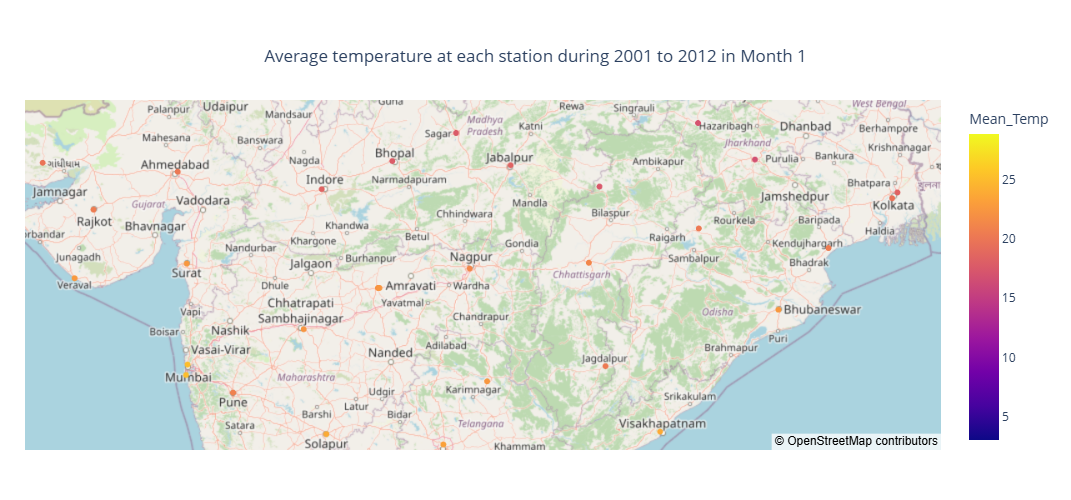

In [8]:
from climate import temperature_plot

fig = temperature_plot(merged_data, country="India", year_begin=2001, year_end=2012, month=1)
fig.show()

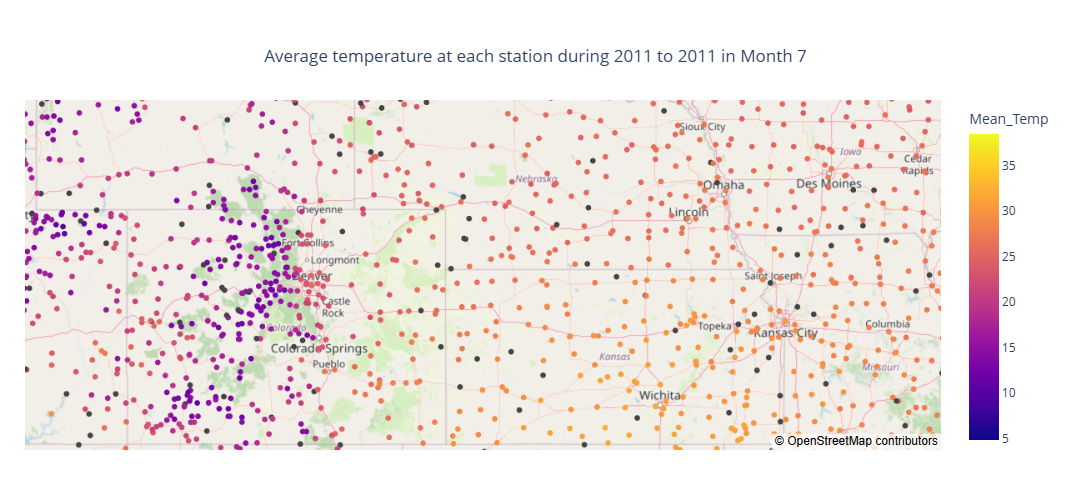

In [9]:
fig = temperature_plot(merged_data, country="United States", year_begin=2011, year_end=2011, month=7)
fig.show()

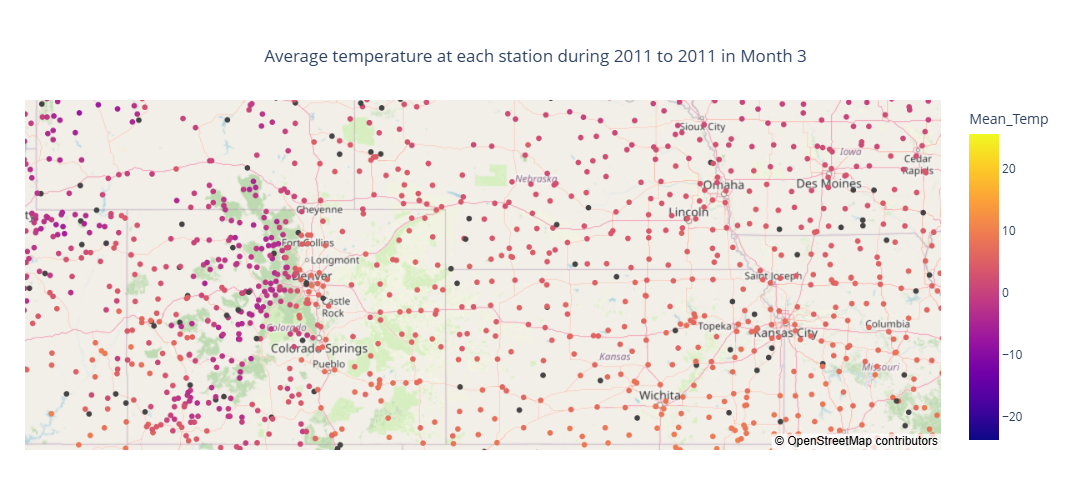

In [10]:
fig = temperature_plot(merged_data, country="United States", year_begin=2011, year_end=2011, month=3)
fig.show()

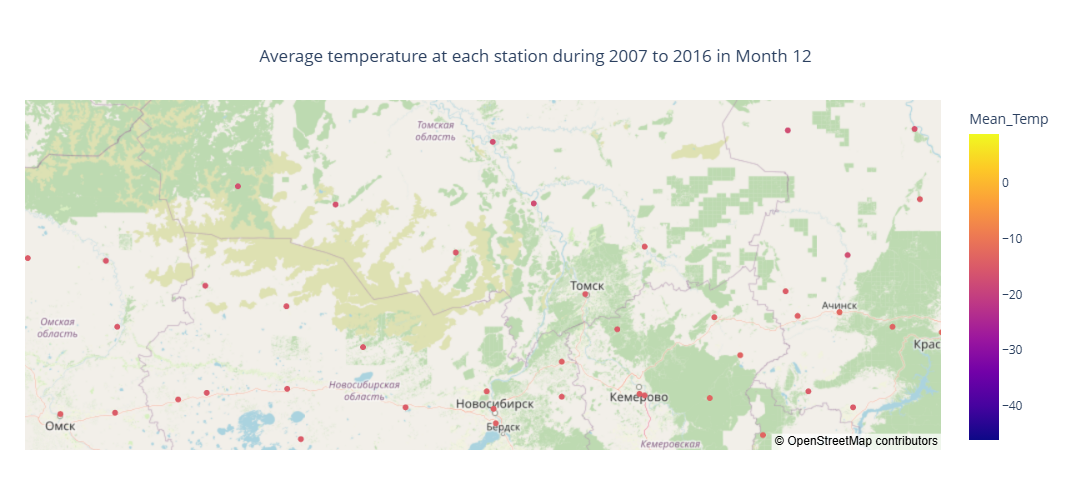

In [11]:
fig = temperature_plot(merged_data, country="Russia", year_begin=2007, year_end=2016, month=12)
fig.show()

# Exercise 2: NBA stats analysis

In this exercise, we will work with the NBA regular season dataset: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/Regular_Season.csv.

The template script is `NBA.py`.

## Step 1: Remove columns

You will first write the function `read_NBA_stats`, which reads the csv file from the specified URL `url` to a dataframe and then keeps only the following columns: 'year', 'PLAYER', 'TEAM', 'GP', 'PTS', 'REB', 'AST', 'STL', 'BLK'. Your output should match the output given in the cell below.

In [49]:
from NBA import read_NBA_stats

url = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/Regular_Season.csv"

df = read_NBA_stats(url)
df

year            PLAYER TEAM  GP   PTS  REB  AST  STL  BLK
0     2012-13      Kevin Durant  OKC  81  2280  640  374  116  105
1     2012-13       Kobe Bryant  LAL  78  2133  433  469  106   25
2     2012-13      LeBron James  MIA  76  2036  610  551  129   67
3     2012-13      James Harden  HOU  78  2023  379  455  142   38
4     2012-13   Carmelo Anthony  NYK  67  1920  460  171   52   32
...       ...               ...  ...  ..   ...  ...  ...  ...  ...
6254  2023-24    Justin Jackson  MIN   2     0    0    0    0    0
6255  2023-24      Kaiser Gates  NOP   1     0    1    0    0    0
6256  2023-24   Malcolm Cazalon  DET   1     0    0    0    0    0
6257  2023-24    Ron Harper Jr.  TOR   1     0    0    1    0    0
6258  2023-24  Ryan Arcidiacono  NYK  20     0    8    4    2    0

[6259 rows x 9 columns]

## Part 2: Average

In this part, you will create a **new dataframe** `df_ave` which contains average statistics. For example, average points is defined as `ave_pts = total pts / GP`. Games played (GP) does not need to be averaged and should be kept as is.

This dataframe should be created by calling the user-written function `NBA.convert_to_averages()`, which inputs the total dataframe and outputs the average dataframe.

Similar to the dataframe in part 1, the new dataframe should include columns: 'year', 'PLAYER', 'TEAM', 'GP', 'PTS', 'REB', 'AST', 'STL', 'BLK'. The only difference is that the new dataframe contains the average statistics. Additionally, the averages should be rounded to one decimal place.

After parts 1 and 2, you will have two dataframes. One contains the total statistics and the other contains the average statistics. Again, your output should match the cell below.

In [13]:
from NBA import convert_to_averages

df_ave = convert_to_averages(df)
df_ave

year            PLAYER TEAM  GP   PTS  REB  AST  STL  BLK
0     2012-13      Kevin Durant  OKC  81  28.1  7.9  4.6  1.4  1.3
1     2012-13       Kobe Bryant  LAL  78  27.3  5.6  6.0  1.4  0.3
2     2012-13      LeBron James  MIA  76  26.8  8.0  7.2  1.7  0.9
3     2012-13      James Harden  HOU  78  25.9  4.9  5.8  1.8  0.5
4     2012-13   Carmelo Anthony  NYK  67  28.7  6.9  2.6  0.8  0.5
...       ...               ...  ...  ..   ...  ...  ...  ...  ...
6254  2023-24    Justin Jackson  MIN   2   0.0  0.0  0.0  0.0  0.0
6255  2023-24      Kaiser Gates  NOP   1   0.0  1.0  0.0  0.0  0.0
6256  2023-24   Malcolm Cazalon  DET   1   0.0  0.0  0.0  0.0  0.0
6257  2023-24    Ron Harper Jr.  TOR   1   0.0  0.0  1.0  0.0  0.0
6258  2023-24  Ryan Arcidiacono  NYK  20   0.0  0.4  0.2  0.1  0.0

[6259 rows x 9 columns]

## Part 3: Player statistics

Given a player name, season, and statistics type, write the function `player_stat()` to return a dataframe containing the value of that statistic for the specified player in that season. You should match the output of the test cases below.

**Remark: Please pay special attention to the row index, which is 0.** Hint: you can use the reset_index() method to clear the old row index.

In [14]:
from NBA import player_stat

player_stat(df, player = "Kevin Durant", season = '2012-13', stat = 'PTS')

year        PLAYER TEAM STAT   PTS
0  2012-13  Kevin Durant  OKC  PTS  2280

In [15]:
player_stat(df_ave, player = "James Harden", season = '2016-17', stat = 'AST')

year        PLAYER TEAM STAT   AST
0  2016-17  James Harden  HOU  AST  11.2

## Part 4: Season Leaders

Write a function (named `leader`) to return stats leaders for a certain season. For example, in NBA's 2013-2014 season, the league PTS leader is Kevin Durant and his total PTS is 2593. In order, you should list the leaders in games played (GP), points (PTS), rebounds (REB), assists (AST), steals (STL), and blocks (BLK).

Again, the test cases are provided below. You are allowed to break ties arbitarily.

In [133]:
from NBA import leader

leader(df, "2013-14")

year          PLAYER TEAM stat  value
0  2013-14  Ramon Sessions  MIL   GP     83
1  2013-14    Kevin Durant  OKC  PTS   2593
2  2013-14  DeAndre Jordan  LAC  REB   1114
3  2013-14       John Wall  WAS  AST    721
4  2013-14     Ricky Rubio  MIN  STL    191
5  2013-14     Serge Ibaka  OKC  BLK    219

In [134]:
leader(df_ave, "2013-14")

year          PLAYER TEAM stat  value
0  2013-14  Ramon Sessions  MIL   GP   83.0
1  2013-14    Kevin Durant  OKC  PTS   32.0
2  2013-14  DeAndre Jordan  LAC  REB   13.6
3  2013-14      Chris Paul  LAC  AST   10.7
4  2013-14      Chris Paul  LAC  STL    2.5
5  2013-14   Anthony Davis  NOP  BLK    2.8